# Stærðfræði og reiknifræði – Skiladæmi 7

In [1]:
#BYRJA -- Keyrið til að frumstilla.
import numpy as np, numpy.random as npr, numpy.linalg as la
import scipy.stats as stat, statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rc('axes', axisbelow=True)
%matplotlib inline
# disp(x,y...) skrifar x,y... með 3 aukastöfum
def disp(*args): print(*(f'{a:.3f}' if isinstance(a,float) else a for a in args))
np.set_printoptions(precision=4, floatmode='fixed', suppress=True)

In [2]:
def movavg3(smit):
    ret = np.zeros( len(smit) )
    for i in range( 0,len(smit)-3,1 ):
        arr = [smit[i],smit[i+1],smit[i+2]]
        ret[i+3] = np.mean(arr)
    return ret

def movavgN(smit,N):
    ret = np.zeros( len(smit) )
    for i in range( 0,len(smit)-N,1 ):
        arr = smit[i:i+N]
        ret[i+N] = np.mean(arr)
    return ret

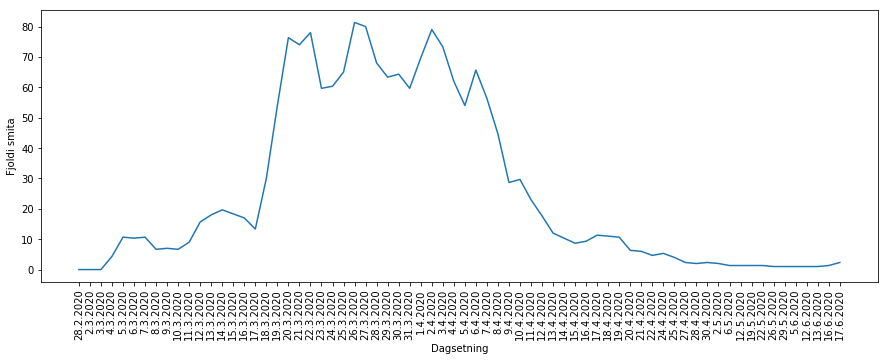

In [3]:
covid_dates = np.loadtxt('dates.txt',dtype=str)
covid_smit = np.loadtxt('smit.txt')

test = movavgN(covid_smit,3)

plt.figure(figsize=(15,5))
plt.plot(covid_dates,test)
plt.xlabel('Dagsetning')
plt.ylabel('Fjoldi smita')
plt.xticks(rotation=90);

## 2. Lágmörkun með stigli
**a)** Í skiladæmi 5.B1 var stigull (*gradient*) Rosenbrock-fallsins, $f(x, y) = (1 - x)^2 + 100(y - x^2)^2$ reiknaður og útkoman var 

$$\nabla f(x,y) = \pmatrix{2x - 2 - 400x(y - x^2) \\ 200(y - x^2)}$$

Ef við umritum formúlurnar með því að skrifa $(x_0, y_0)$ í stað $(x,y)$ og skilgreina $x = (x_0, y_0)$ fæst

$$\begin{align}f(x) &= (1-x_0)^2 + 100(x_1 - x_0^2)^2 \\
        \nabla f(x) &= \pmatrix{2x_0 - 2 - 400x_0(x_1 - x_0^2) \\ 200(x_1 - x_0^2)}\end{align}$$
        
Skrifið Python föll `f(x)` og `g(x)` sem reikna fallsgildi og stigul Rosenbrock-fallsins.

**b)** `opt.minimize` hefur valkvæðan stika `jac` sem er nafn falls sem reiknar stigul fallsins sem á að lágmarka (*jac* er stytting á *Jacobian*, sem fyrir $f\colon\Bbb{R}\to\Bbb{R^2}$ er samheiti við *gradient*). Með *jac*-stika verður lágmörkunarkallið:

        result = opt.minimize(f, x0, jac=g)
        
Ef `opt.minimize` hefur aðgang að stiglinum þá þarf mun færri köll á fallið til að finna lággildið. Ákvarðið lággildi Rosenbrock-fallsins ef byrjað er í $x_0=(-1.2, 1)$ bæði með og án stigul-falls, og finnið út hve margar ítrekanir og köll á `f` þarf í hvoru tilviki fyrir sig.